In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.multivariate.pca import PCA


In [2]:
energy=pd.read_csv("DataWarehouse/FactEnergy.csv")
country=pd.read_csv("DataWarehouse/FactCountry.csv")


In [17]:
country.head()

,IsoCode,Year,Population,GDP,ElectricityDemand,ElectricityProduction,ElectricityImport,EnergyConsumption
0,AUS,1980,14706329.0,3.357560e+11,0.0,0.0,0.0,844.247
1,AUS,1981,14930055.0,3.487270e+11,0.0,0.0,0.0,857.794
2,AUS,1982,15168446.0,3.483010e+11,0.0,0.0,0.0,849.919
3,AUS,1983,15383079.0,3.483540e+11,0.0,0.0,0.0,841.572
4,AUS,1984,15579478.0,3.723800e+11,0.0,0.0,0.0,871.355


In [3]:
countrydim=pd.read_csv("DataWarehouse/DimCountry.csv")
countrydim.head()

,IsoCode,Country,Region,Continent,DevelopmentStatus
0,AFG,Afghanistan,South Asia,Asia,Least Developed
1,ALB,Albania,Europe,Europe,Developing
2,DZA,Algeria,North Africa,Africa,Developing
3,ASM,American Samoa,NaN,NaN,Developing
4,AGO,Angola,Sub-Saharan Africa,Africa,Least Developed


In [4]:
df=pd.merge(country,countrydim,on='IsoCode')
df.head()

,IsoCode,Year,Population,GDP,ElectricityDemand,ElectricityProduction,ElectricityImport,EnergyConsumption,Country,Region,Continent,DevelopmentStatus
0,AUS,1980,14706329.0,3.357560e+11,0.0,0.0,0.0,844.247,Australia,Oceania,Oceania,Developed
1,AUS,1981,14930055.0,3.487270e+11,0.0,0.0,0.0,857.794,Australia,Oceania,Oceania,Developed
2,AUS,1982,15168446.0,3.483010e+11,0.0,0.0,0.0,849.919,Australia,Oceania,Oceania,Developed
3,AUS,1983,15383079.0,3.483540e+11,0.0,0.0,0.0,841.572,Australia,Oceania,Oceania,Developed
4,AUS,1984,15579478.0,3.723800e+11,0.0,0.0,0.0,871.355,Australia,Oceania,Oceania,Developed


In [5]:
print(country.shape)
print(countrydim.shape)
print(df.shape)

(1094, 8)
(220, 5)
(1094, 12)


In [21]:
df.dtypes

IsoCode                   object
Year                       int64
Population               float64
GDP                      float64
ElectricityDemand        float64
ElectricityProduction    float64
ElectricityImport        float64
EnergyConsumption        float64
Country                   object
Region                    object
Continent                 object
DevelopmentStatus         object
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IsoCode                1094 non-null   object 
 1   Year                   1094 non-null   int64  
 2   Population             1094 non-null   float64
 3   GDP                    1094 non-null   float64
 4   ElectricityDemand      1094 non-null   float64
 5   ElectricityProduction  1094 non-null   float64
 6   ElectricityImport      1094 non-null   float64
 7   EnergyConsumption      1094 non-null   float64
 8   Country                1094 non-null   object 
 9   Region                 1094 non-null   object 
 10  Continent              1094 non-null   object 
 11  DevelopmentStatus      1094 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 102.7+ KB


In [6]:
df.isna().sum()

IsoCode                  0
Year                     0
Population               0
GDP                      0
ElectricityDemand        0
ElectricityProduction    0
ElectricityImport        0
EnergyConsumption        0
Country                  0
Region                   0
Continent                0
DevelopmentStatus        0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

# Univariate Analysis

In [25]:
df.head()

,IsoCode,Year,Population,GDP,ElectricityDemand,ElectricityProduction,ElectricityImport,EnergyConsumption,Country,Region,Continent,DevelopmentStatus
0,AUS,1980,14706329.0,3.357560e+11,0.0,0.0,0.0,844.247,Australia,Oceania,Oceania,Developed
1,AUS,1981,14930055.0,3.487270e+11,0.0,0.0,0.0,857.794,Australia,Oceania,Oceania,Developed
2,AUS,1982,15168446.0,3.483010e+11,0.0,0.0,0.0,849.919,Australia,Oceania,Oceania,Developed
3,AUS,1983,15383079.0,3.483540e+11,0.0,0.0,0.0,841.572,Australia,Oceania,Oceania,Developed
4,AUS,1984,15579478.0,3.723800e+11,0.0,0.0,0.0,871.355,Australia,Oceania,Oceania,Developed


In [26]:
print(df['Population'].mean())
print(df['Population'].median())
print(df['Population'].min())
print(df['Population'].max())
print(df['Population'].std())
print(df['Population'].skew())
print(df['Population'].kurtosis())

161629848.047532
56932272.0
6319116.0
1428627712.0
310961526.710597
3.0120795187515474
7.932630178883668


In [27]:
print(df['GDP'].mean())
print(df['GDP'].median())
print(df['GDP'].min())
print(df['GDP'].max())
print(df['GDP'].std())
print(df['GDP'].skew())
print(df['GDP'].kurtosis())

2264758718464.351
1239750000000.0
149135000000.0
26966000000000.0
3505791395942.4263
3.779314109467142
16.394365209822638


In [28]:
print(df['ElectricityDemand'].mean())
print(df['ElectricityDemand'].median())
print(df['ElectricityDemand'].min())
print(df['ElectricityDemand'].max())
print(df['ElectricityDemand'].std())
print(df['ElectricityDemand'].skew())
print(df['ElectricityDemand'].kurtosis())

418.00316270566736
144.95499999999998
0.0
9445.28
992.6267207650686
4.977024532404183
29.184618494489097


In [29]:
print(df['ElectricityProduction'].mean())
print(df['ElectricityProduction'].median())
print(df['ElectricityProduction'].min())
print(df['ElectricityProduction'].max())
print(df['ElectricityProduction'].std())
print(df['ElectricityProduction'].skew())
print(df['ElectricityProduction'].kurtosis())

535.5542915904936
235.46499999999997
0.0
9459.59
1033.425330512829
4.3939323522849945
23.291426683255054


In [30]:
print(df['ElectricityImport'].mean())
print(df['ElectricityImport'].median())
print(df['ElectricityImport'].min())
print(df['ElectricityImport'].max())
print(df['ElectricityImport'].std())
print(df['ElectricityImport'].skew())
print(df['ElectricityImport'].kurtosis())

0.21010054844606918
0.0
-77.03
66.67
17.518075466769005
-0.622700604495067
4.9504991374722636


In [31]:
print(df['EnergyConsumption'].mean())
print(df['EnergyConsumption'].median())
print(df['EnergyConsumption'].min())
print(df['EnergyConsumption'].max())
print(df['EnergyConsumption'].std())
print(df['EnergyConsumption'].skew())
print(df['EnergyConsumption'].kurtosis())

3816.330936014625
1695.1855
0.0
47427.562
6400.174306491854
3.559139774065511
13.595481080508055


<Axes: xlabel='Continent'>

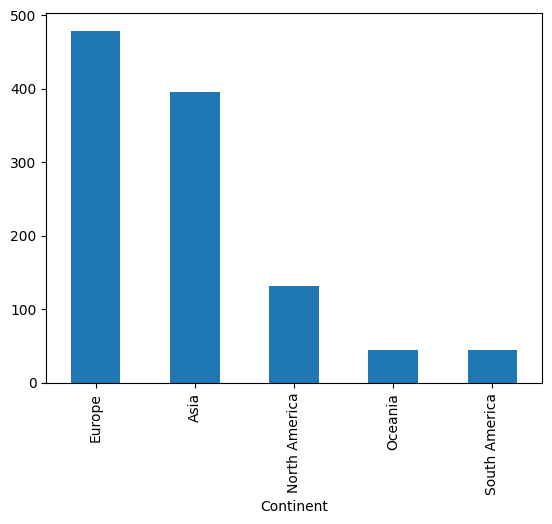

In [32]:
df['Continent'].value_counts().plot(kind='bar')

<Axes: xlabel='Region'>

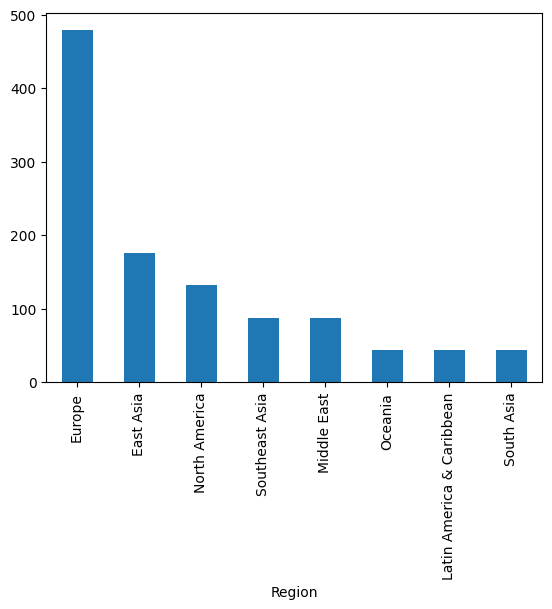

In [33]:
df['Region'].value_counts().plot(kind='bar')

<Axes: xlabel='DevelopmentStatus'>

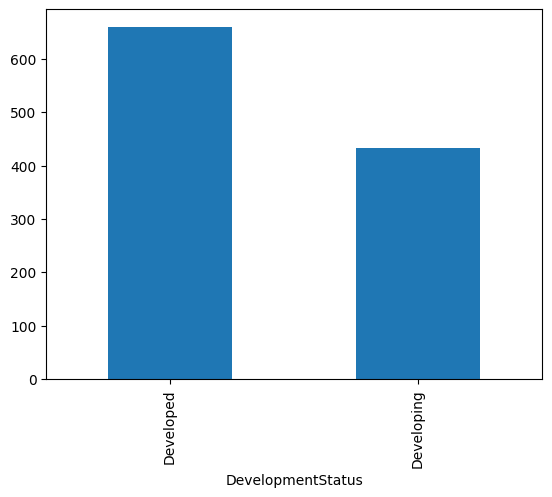

In [34]:
df['DevelopmentStatus'].value_counts().plot(kind='bar')

# Bivartiate Analysis

<Axes: xlabel='Population', ylabel='GDP'>

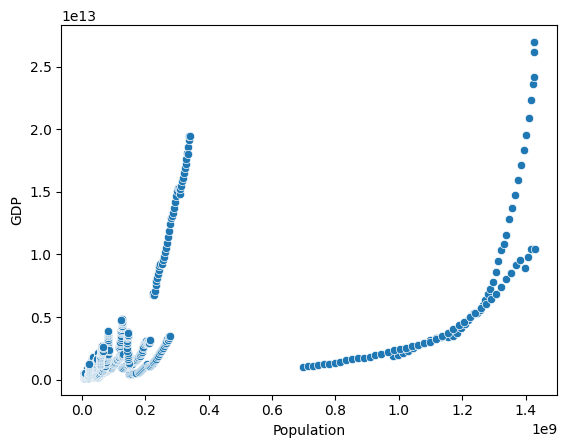

In [38]:
sns.scatterplot(data=df,x='Population',y='GDP')

<Axes: xlabel='Population', ylabel='EnergyConsumption'>

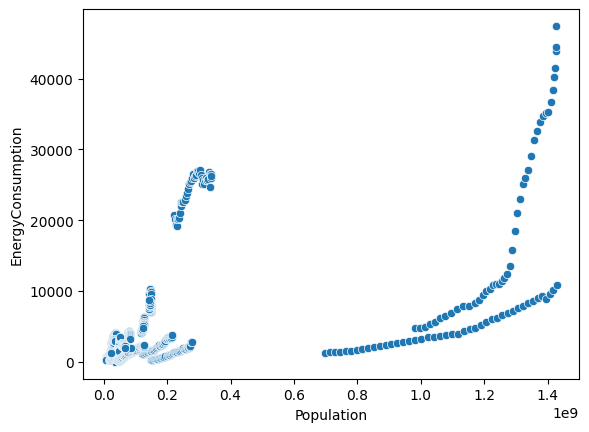

In [40]:
sns.scatterplot(data=df,x='Population',y='EnergyConsumption')

<Axes: xlabel='GDP', ylabel='EnergyConsumption'>

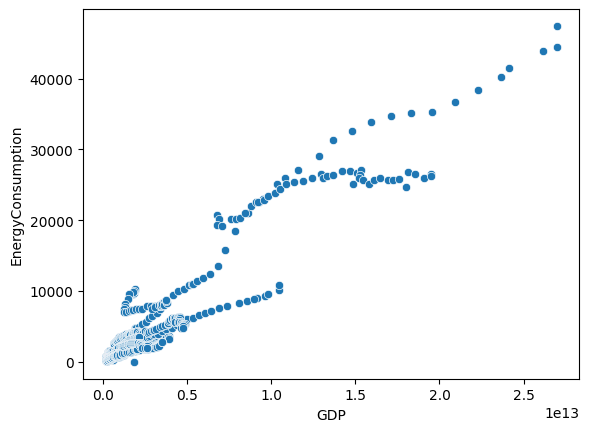

In [41]:
sns.scatterplot(data=df,x='GDP',y='EnergyConsumption')

<Axes: xlabel='Population', ylabel='ElectricityDemand'>

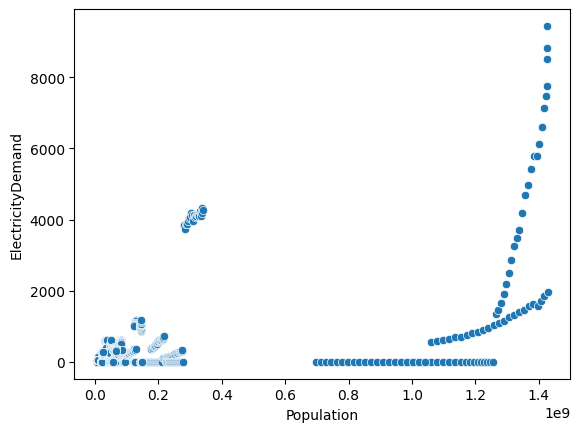

In [42]:
sns.scatterplot(data=df,x='Population',y='ElectricityDemand')

<Axes: xlabel='GDP', ylabel='ElectricityDemand'>

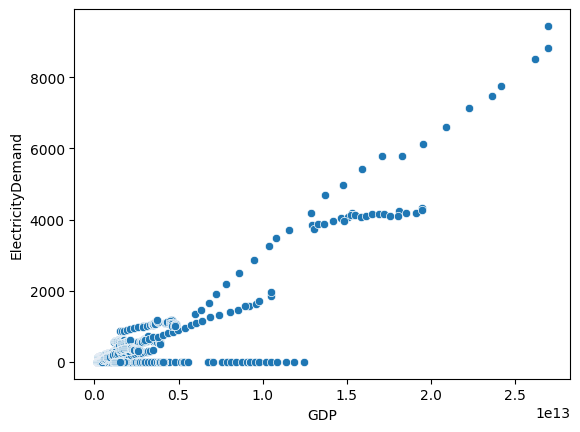

In [45]:
sns.scatterplot(data=df,x='GDP',y='ElectricityDemand')

<Axes: xlabel='Year', ylabel='GDP'>

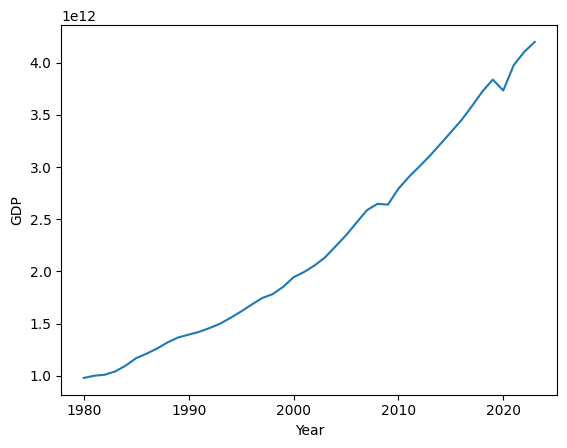

In [8]:
sns.lineplot(data=df,x='Year',y='GDP',errorbar=None)

<Axes: xlabel='Year', ylabel='Population'>

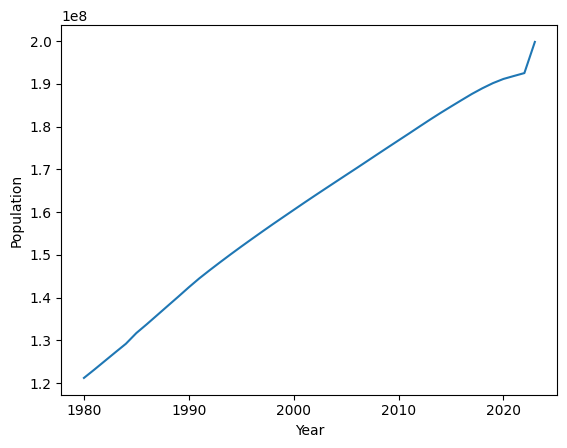

In [ ]:
sns.lineplot(data=df,x='Year',y='Population',errorbar=None)

<Axes: xlabel='Year', ylabel='GDP'>

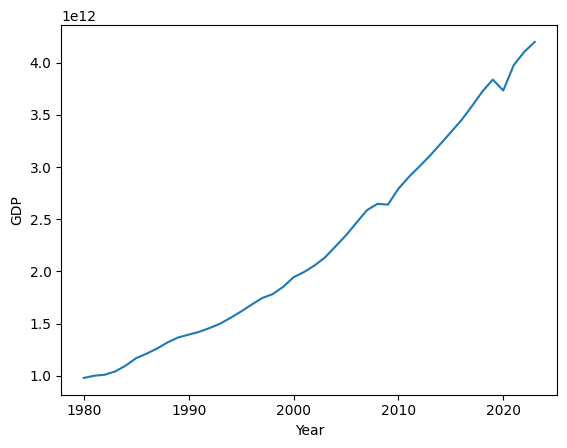

In [55]:
sns.lineplot(data=df,x='Year',y='GDP',errorbar=None)

<Axes: xlabel='Year', ylabel='EnergyConsumption'>

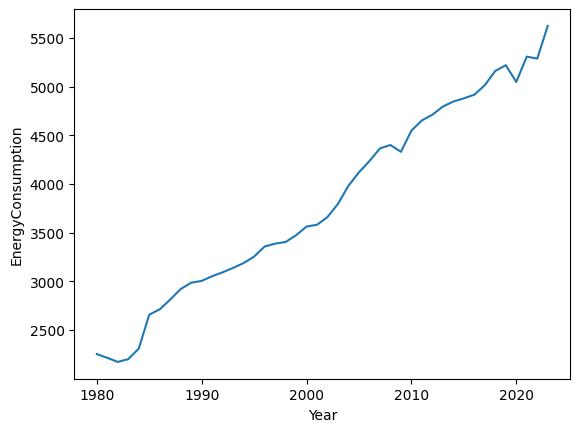

In [56]:
sns.lineplot(data=df,x='Year',y='EnergyConsumption',errorbar=None)

<Axes: xlabel='Year', ylabel='ElectricityDemand'>

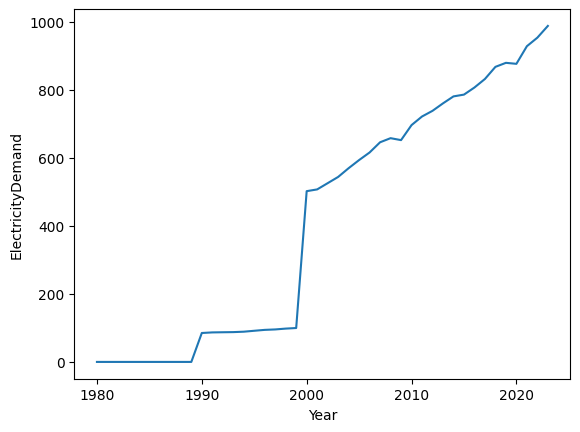

In [57]:
sns.lineplot(data=df,x='Year',y='ElectricityDemand',errorbar=None)

<Axes: >

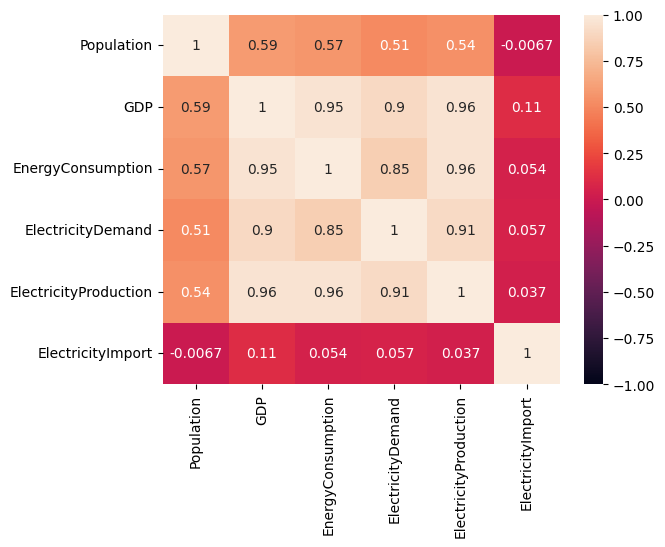

In [58]:
corr=df[['Population','GDP','EnergyConsumption','ElectricityDemand','ElectricityProduction','ElectricityImport']].corr()
sns.heatmap(corr,annot=True,vmax=1,vmin=-1)

# Multivariate Analysis

In [12]:
X=df[['GDP','Population','EnergyConsumption','ElectricityProduction','ElectricityImport']]
y=df['ElectricityDemand']

X=sm.add_constant(X)

reg=sm.OLS(y,X).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ElectricityDemand   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1409.
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:34:16   Log-Likelihood:                -8000.6
No. Observations:                1094   AIC:                         1.601e+04
Df Residuals:                    1088   BIC:                         1.604e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -83.8768     13.950     -6.013      0.000    -111.248     -56.506
GDP                    1.766e-10   1.33e-11     13.258      0.000     1.5e-10    2.03e-10
Population             2.637e-08   4.47e-08      0.590      0.555   -6.14e-08    1.14e-07
EnergyConsumption        -0.0963      0.007    -14.231      0.000      -0.110      -0.083
ElectricityProduction     0.8690      0.047     18.669      0.000       0.778       0.960
ElectricityImport        -0.6890      0.660     -1.044      0.297      -1.984       0.606
==============================================================================
Omnibus:                      904.354   Durbin-Watson:                   0.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31240.227
Skew:                          -3.577   Prob(JB):                         0.00
Kurtosis:                      28.182   Cond. No.                     5.29e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X=df[['Population','GDP','EnergyConsumption','ElectricityDemand','ElectricityProduction','ElectricityImport']]

pca=PCA(X)

print(pca.coeff)

        Population        GDP  ...  ElectricityProduction  ElectricityImport
comp_0   22.261410  32.436762  ...              32.224563           2.581899
comp_1    4.195852  -1.507129  ...               0.847198         -32.833795
comp_2  -24.084406   2.776222  ...               5.401694          -3.020986
comp_3    0.789184  -1.760370  ...              -1.811593           0.059745
comp_4   -0.353797   5.322793  ...              -2.647912          -0.378739
comp_5    0.133605   0.668266  ...               3.922774           0.048097

[6 rows x 6 columns]
